In [82]:
import pandas as pd
import os
import re

# Directory where your CSV files are stored
directory = 'cyclical'

# Initialize a list to hold the data from each file
dataframes = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.startswith("ES100_Trevor_Cyclical") and filename.endswith(".csv"):
        # Extract the test_id from the filename using regular expression
        match = re.search(r'_(\d+)_1.csv', filename)
        if match:
            test_id = int(match.group(1))
            # Construct the full file path
            filepath = os.path.join(directory, filename)
            # Read the CSV file, skipping rows until the header is found
            df = pd.read_csv(filepath, skiprows=lambda x: x in [0, 1, 2, 3], engine='python').iloc[:-1]
            # Add the test_id column to the dataframe
            df['test_id'] = test_id
            # Append the dataframe to the list
            dataframes.append(df)

# Combine all the dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_csv_path = os.path.join(directory, "combined_cyclical.csv")
combined_df.to_csv(combined_csv_path, index=False)

print(f'Combined CSV created at: {combined_csv_path}')

Combined CSV created at: cyclical\combined_cyclical.csv


In [117]:
test_dict = {'Basalt 0deg': [1, 2], 'Hemp 45deg': [5, 6], 'Flax 45deg': [9, 10], 'Basalt Hemp 0deg': [13, 14], 'Hemp 0deg': [3, 4], 'Flax 0deg': [7, 8], 'Basalt Flax 0deg': [16, 15], 'Basalt 45deg': [11, 12]}

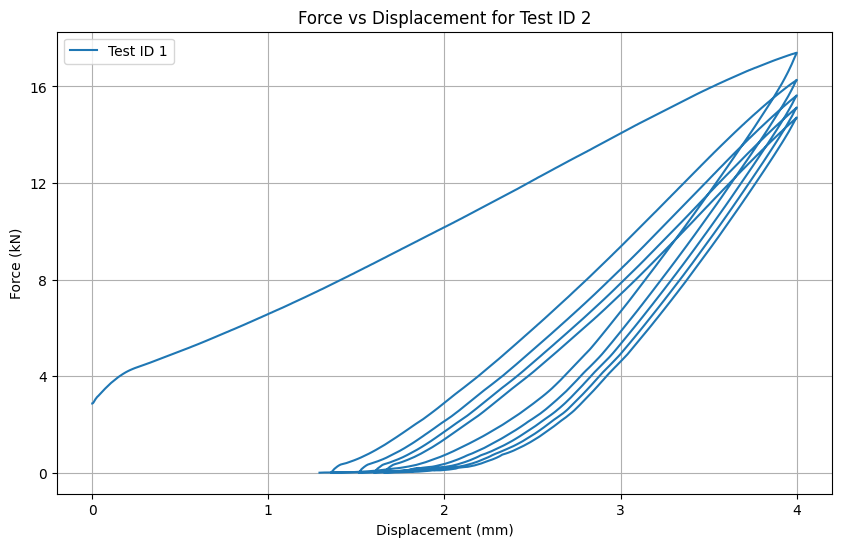

In [83]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

combined_csv_path = 'cyclical/combined_cyclical.csv'  # Update this path
df = pd.read_csv(combined_csv_path, skiprows=[1])

# Convert 'Displacement' and 'Force' to floats, coerce errors to NaN
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce')
df['Force'] = pd.to_numeric(df['Force'], errors='coerce')

# Drop rows with NaN values that resulted from coercion
df.dropna(subset=['Displacement', 'Force'], inplace=True)

# Filter the dataframe for test_id 1
df_test_id_2 = df[df['test_id'] == 2]

# Plotting as a scatter plot with the reduced dataset
plt.figure(figsize=(10, 6))
plt.plot(df_test_id_2['Displacement'], df_test_id_2['Force'], label='Test ID 1')

# Setting the maximum number of ticks on each axis
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))

plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')
plt.title('Force vs Displacement for Test ID 2')
plt.legend()
plt.grid(True)
plt.show()

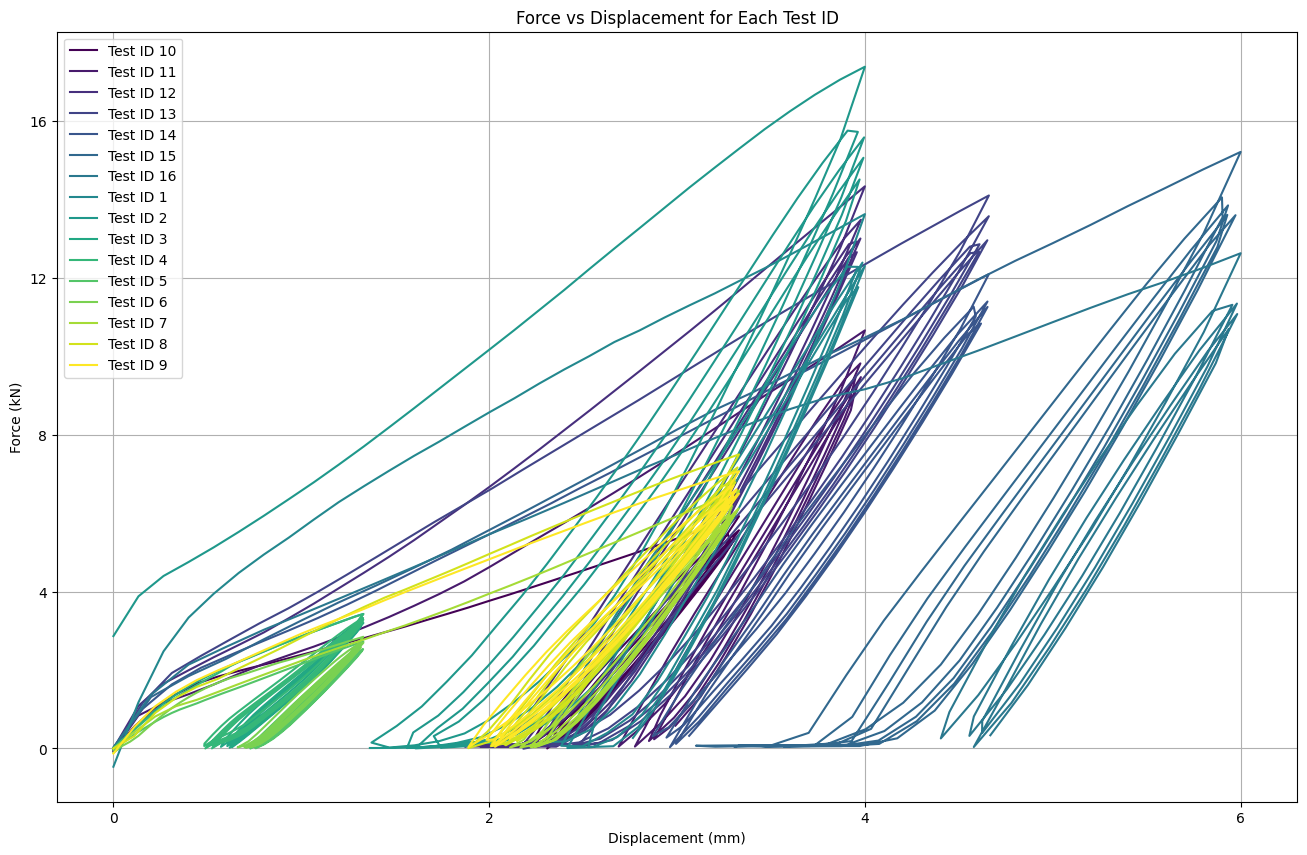

In [84]:
import numpy as np
# Get unique test IDs
unique_test_ids = df['test_id'].unique()

# Set a color cycle for the plots
color_cycle = plt.cm.viridis(np.linspace(0, 1, len(unique_test_ids)))

plt.figure(figsize=(16, 10))

# Plot each test_id in a different color
for test_id, color in zip(unique_test_ids, color_cycle):
    # Filter the dataframe for the current test_id
    df_test_id = df[df['test_id'] == test_id]
    
    # Select every 100th data point for plotting to reduce the dataset size
    df_test_id_subset = df_test_id.iloc[::100, :]
    
    # Plotting as a scatter plot with the reduced dataset
    plt.plot(df_test_id_subset['Displacement'], df_test_id_subset['Force'], label=f'Test ID {test_id}', color=color)

# Setting the maximum number of ticks on each axis
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))

plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')
plt.title('Force vs Displacement for Each Test ID')
plt.legend()
plt.grid(True)
plt.show()

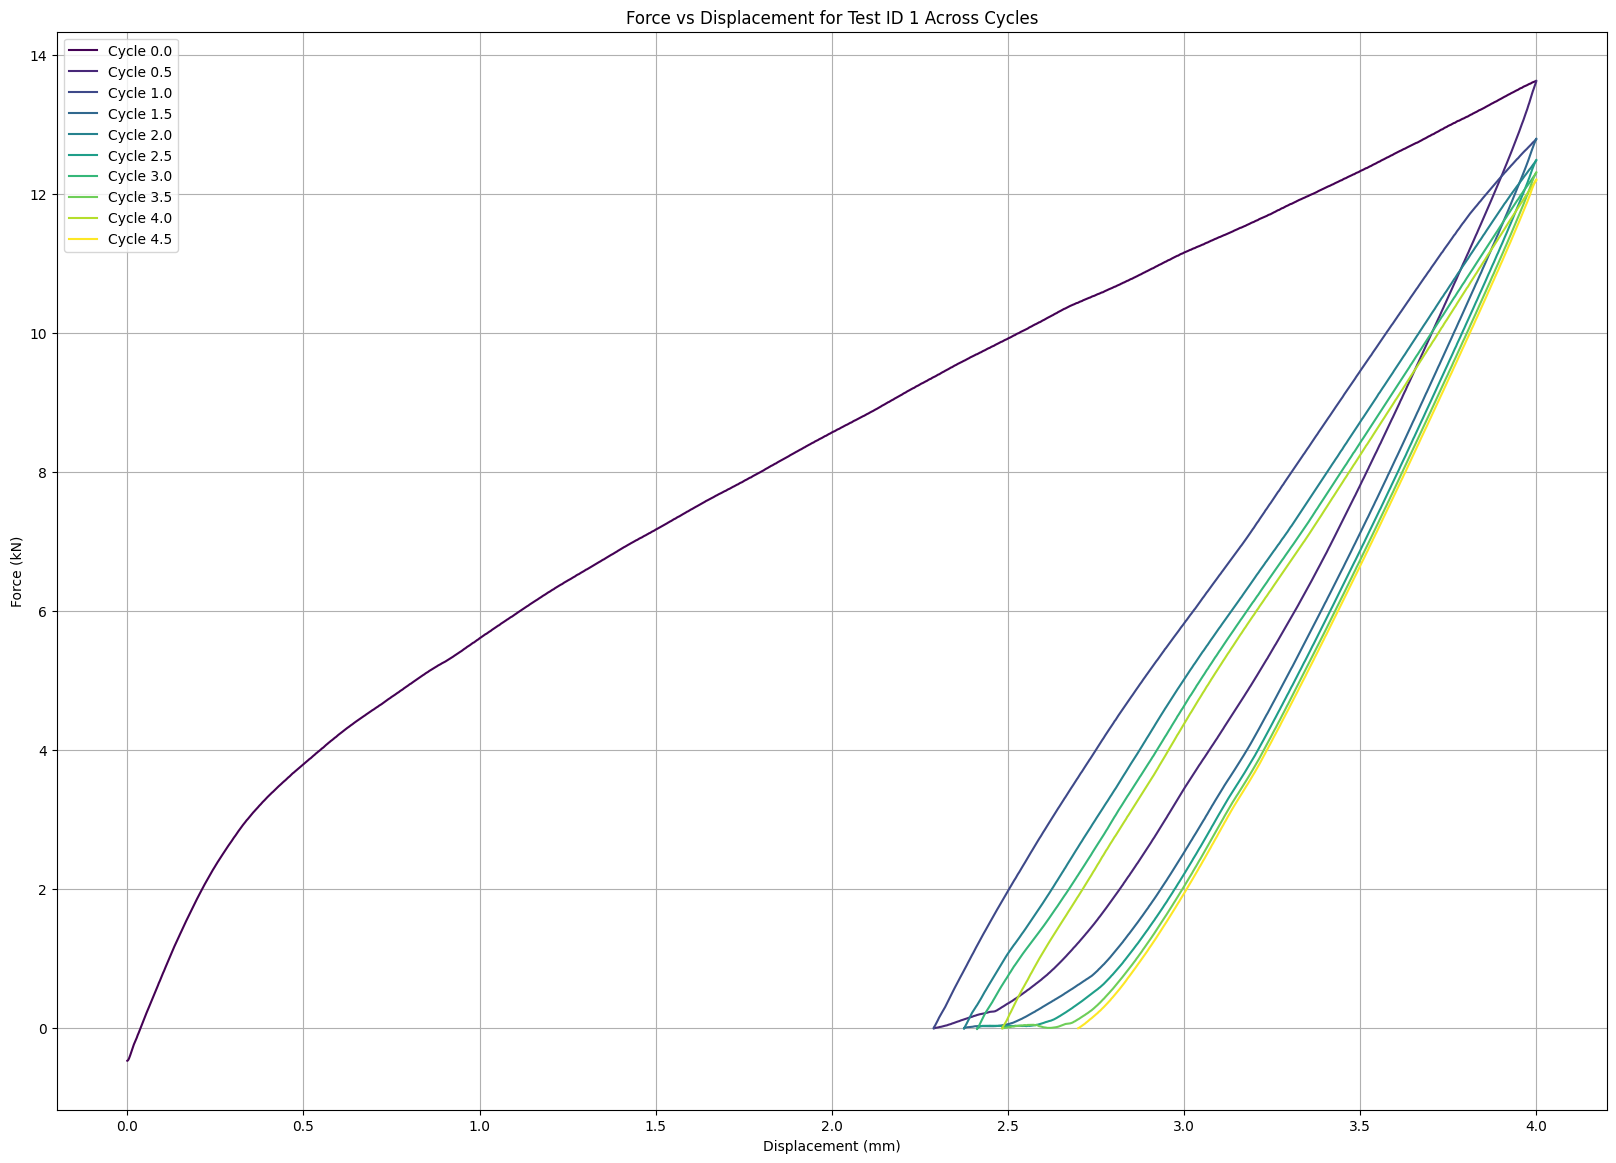

In [88]:
from matplotlib import cm

df_test_id = df[df['test_id'] == 1]
# Get the total number of data points (half-cycles)
total_cycles = df_test_id['Cycle count'].nunique()

# Prepare a colormap
cmap = cm.viridis(np.linspace(0, 1, total_cycles))

plt.figure(figsize=(20, 14))

# Plot each cycle with a different color from the colormap
for i, cycle in enumerate(np.arange(0, total_cycles / 2, 0.5)):
    cycle_data = df_test_id[df_test_id['Cycle count'] == cycle]
    plt.plot(cycle_data['Displacement'], cycle_data['Force'], label=f'Cycle {cycle}', color=cmap[i])

plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')
plt.title('Force vs Displacement for Test ID 1 Across Cycles')
plt.legend()
plt.grid(True)
plt.show()


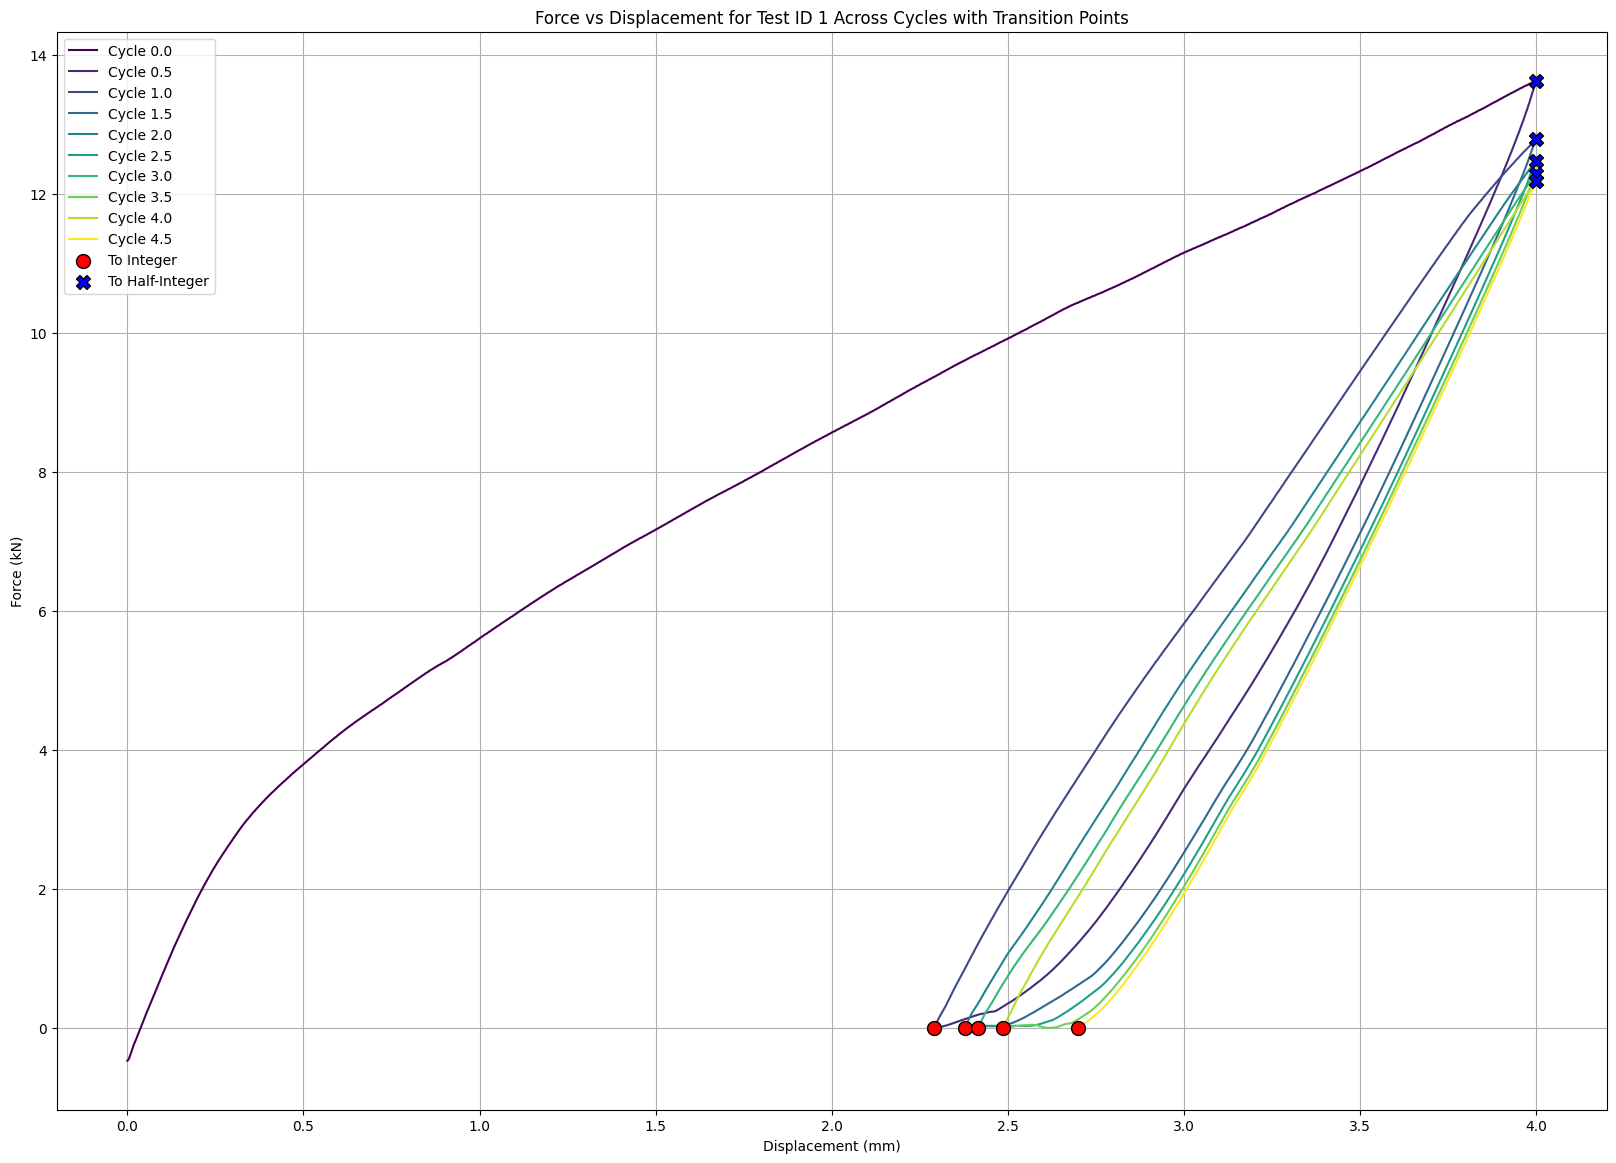

In [111]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

for n in range(1,2):
    df_test_id = df[df['test_id'] == n]
    total_cycles = df_test_id['Cycle count'].nunique()

    # Prepare a colormap
    cmap = cm.viridis(np.linspace(0, 1, total_cycles))

    plt.figure(figsize=(20, 14))

    # Variables to store transition points
    switch_to_half = []  # From whole to half cycle
    switch_to_whole = []  # From half to whole cycle

    # Plot each cycle with a different color from the colormap
    for i, cycle in enumerate(np.arange(0, total_cycles / 2, 0.5)):
        cycle_data = df_test_id[df_test_id['Cycle count'] == cycle]
        plt.plot(cycle_data['Displacement'], cycle_data['Force'], label=f'Cycle {cycle}', color=cmap[i])

    # Store transition points
    transition_to_int = []  # From half-integer to integer
    transition_to_half = [] # From integer to half-integer

    # Find the transition points where the cycle count changes
    cycle_values = df_test_id['Cycle count'].values
    for i in range(len(cycle_values) - 1):
        if cycle_values[i] != cycle_values[i + 1]:
            # Check if transitioning to integer
            if cycle_values[i + 1] % 1 == 0:
                transition_to_int.append((df_test_id.iloc[i]['Displacement'], df_test_id.iloc[i]['Force']))
            else: # Otherwise, it's transitioning to a half-integer
                transition_to_half.append((df_test_id.iloc[i]['Displacement'], df_test_id.iloc[i]['Force']))

    # Select the last data point of cycle 4.5
    cycle_4_5_data = df_test_id[df_test_id['Cycle count'] == 4.5]
    last_point_of_cycle_4_5 = cycle_4_5_data.iloc[-1]

    # Append this point to the transition_to_int list
    transition_to_int.append((last_point_of_cycle_4_5['Displacement'], last_point_of_cycle_4_5['Force']))


    # Plot the transition points
    for point in transition_to_int:
        plt.scatter(point[0], point[1], color='red', zorder=5, marker='o', edgecolors='black', s=100, label='To Integer')

    for point in transition_to_half:
        plt.scatter(point[0], point[1], color='blue', zorder=5, marker='X', edgecolors='black', s=100, label='To Half-Integer')

    # Enhance legend to show only one entry for each type of transition
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.xlabel('Displacement (mm)')
    plt.ylabel('Force (kN)')
    plt.title('Force vs Displacement for Test ID 1 Across Cycles with Transition Points')
    plt.grid(True)
    plt.show()

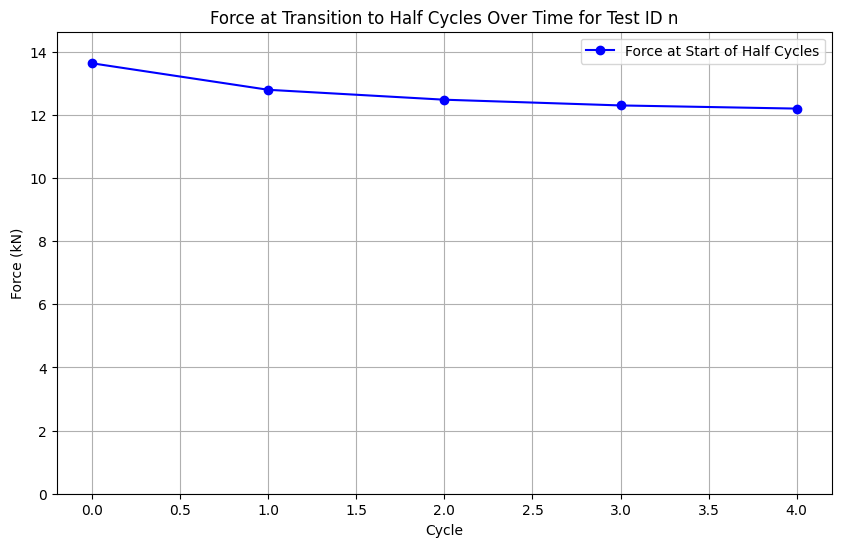

In [110]:
times = []
forces = []
for displacement, force in transition_to_half:
    forces.append(force)
    # make time = index of the current force value
    times.append(forces.index(force))

# Now, plot the force values over time
plt.figure(figsize=(10, 6))
plt.plot(times, forces, '-o', color='blue', label='Force at Start of Half Cycles')
plt.xlabel('Cycle')
plt.ylabel('Force (kN)')
plt.title('Force at Transition to Half Cycles Over Time for Test ID n')
plt.legend()
plt.ylim(0, max(forces) + 1)
plt.grid(True)
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_20648\3933106239.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(test_dict))


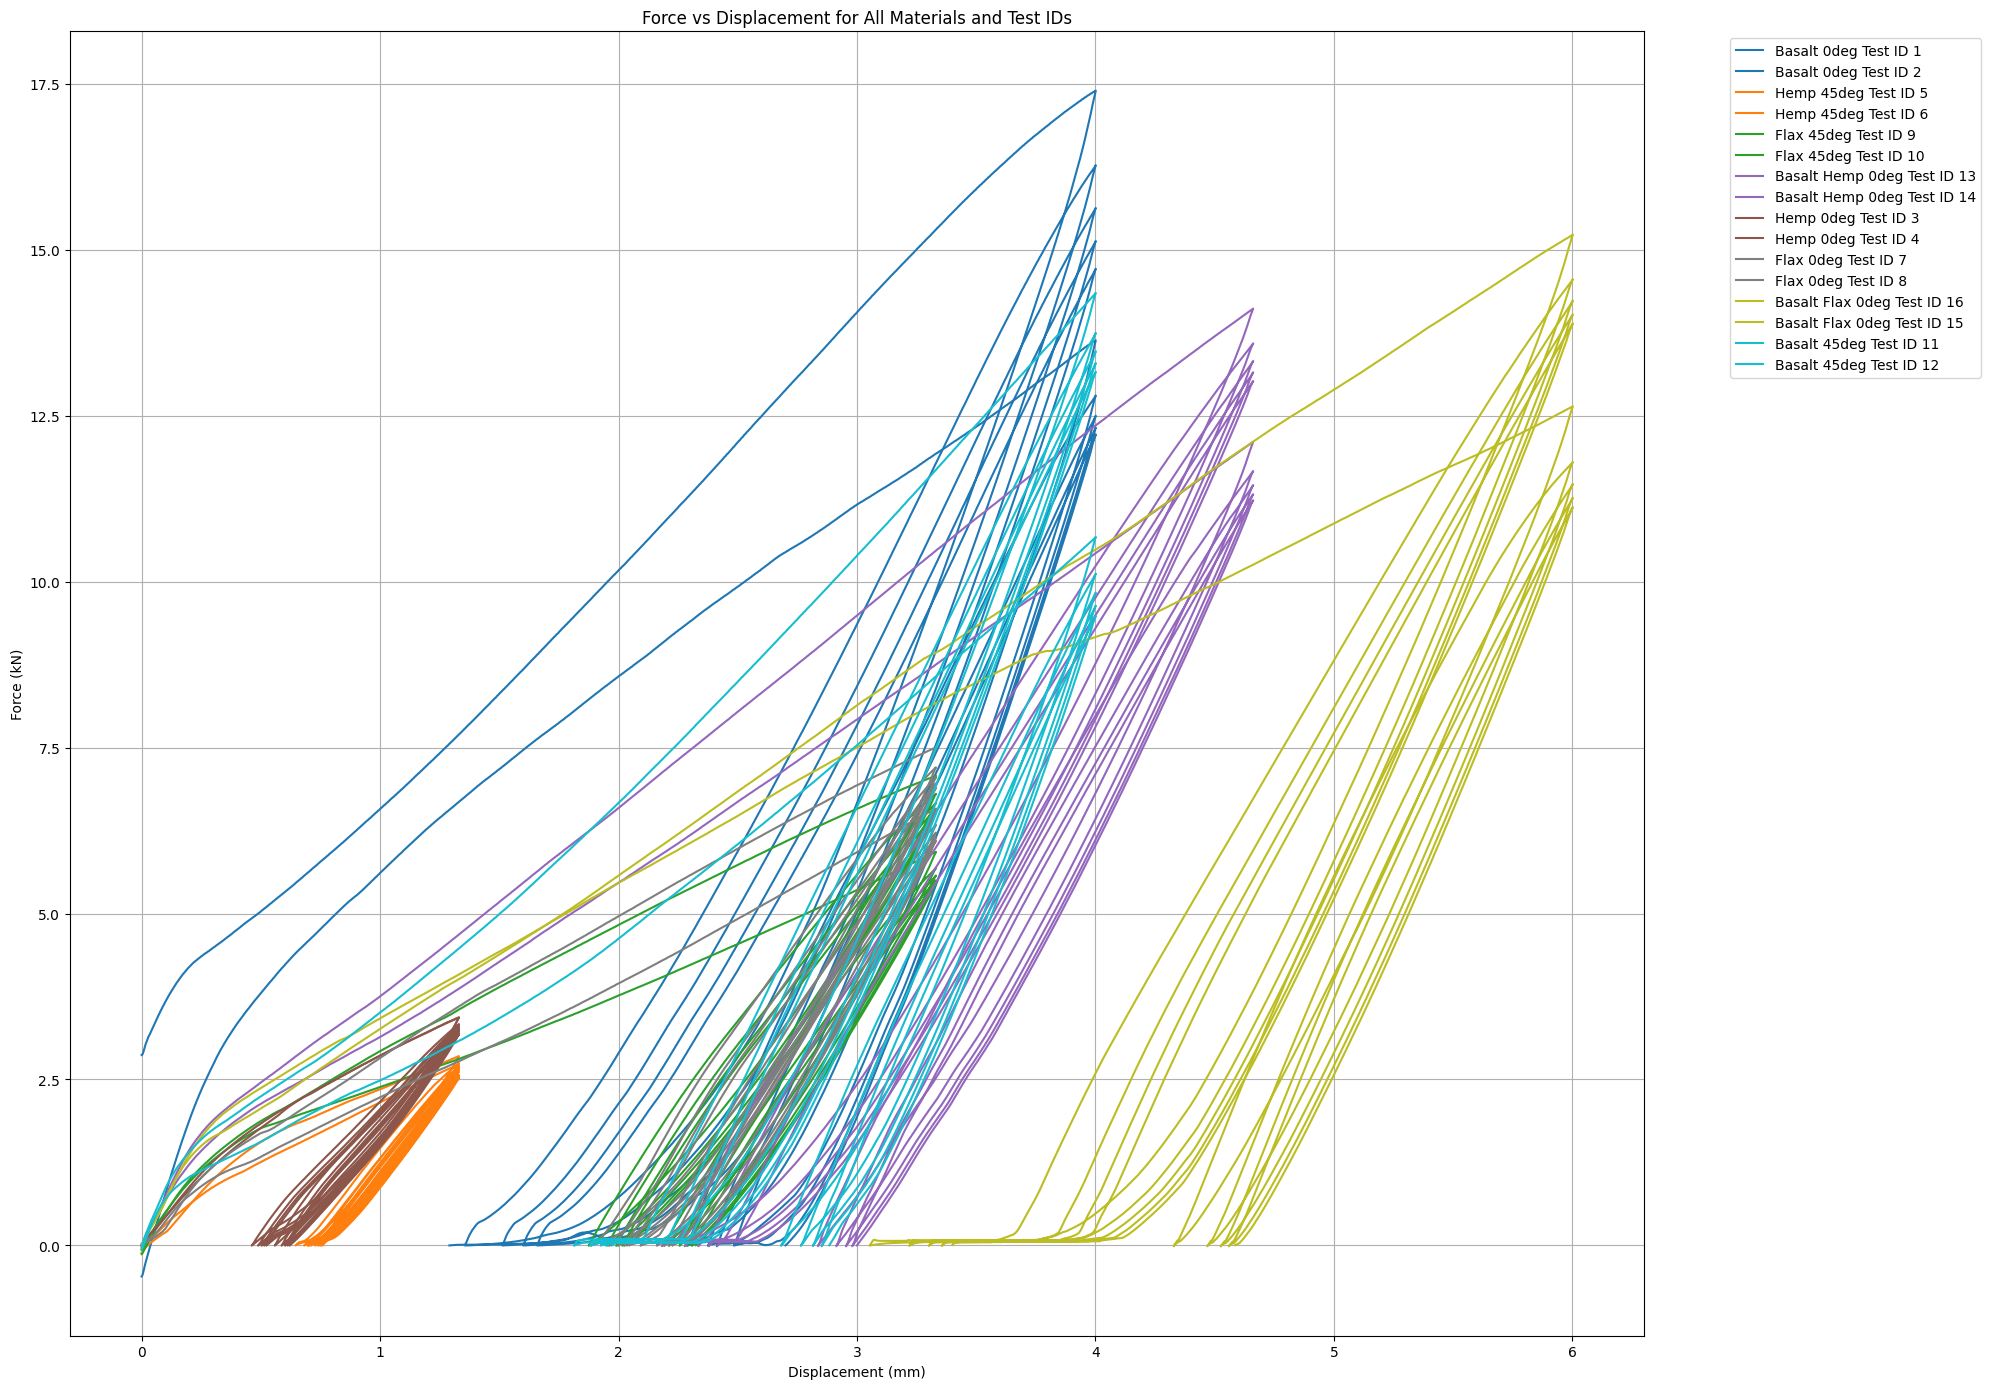

In [118]:
test_dict = {'Basalt 0deg': [1, 2], 'Hemp 45deg': [5, 6], 'Flax 45deg': [9, 10], 'Basalt Hemp 0deg': [13, 14], 'Hemp 0deg': [3, 4], 'Flax 0deg': [7, 8], 'Basalt Flax 0deg': [16, 15], 'Basalt 45deg': [11, 12]}

plt.figure(figsize=(20, 14))

# Prepare a colormap
cmap = cm.get_cmap('tab10', len(test_dict))

for material, test_ids in test_dict.items():
    for test_id in test_ids:
        df_test_id = df[df['test_id'] == test_id]
        plt.plot(df_test_id['Displacement'], df_test_id['Force'], label=f'{material} Test ID {test_id}', color=cmap.colors[list(test_dict.keys()).index(material)])

# After plotting all tests, enhance the legend
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')
plt.title('Force vs Displacement for All Materials and Test IDs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

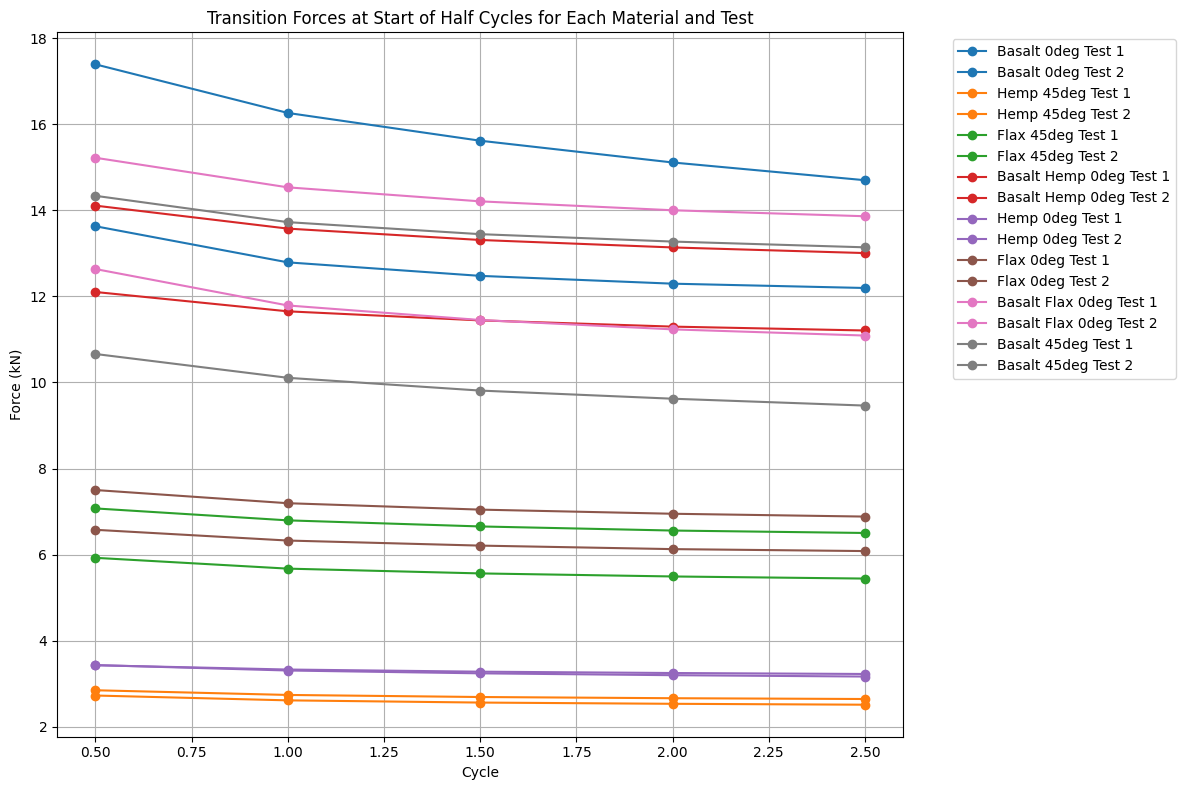

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Your test dictionary
test_dict = {'Basalt 0deg': [1, 2], 'Hemp 45deg': [5, 6], 'Flax 45deg': [9, 10], 'Basalt Hemp 0deg': [13, 14], 'Hemp 0deg': [3, 4], 'Flax 0deg': [7, 8], 'Basalt Flax 0deg': [16, 15], 'Basalt 45deg': [11, 12]}

# Prepare a unique color for each material
material_colors = {
    'Basalt 0deg': 'tab:blue',
    'Hemp 45deg': 'tab:orange',
    'Flax 45deg': 'tab:green',
    'Basalt Hemp 0deg': 'tab:red',
    'Hemp 0deg': 'tab:purple',
    'Flax 0deg': 'tab:brown',
    'Basalt Flax 0deg': 'tab:pink',
    'Basalt 45deg': 'tab:gray',
}

plt.figure(figsize=(12, 8))

for material, test_ids in test_dict.items():
    for test_index, test_id in enumerate(test_ids):
        df_test_id = df[df['test_id'] == test_id]
        transition_to_half = []  # Store transitions for this test
        
        # Find the transition points where the cycle count changes to a half cycle
        cycle_values = df_test_id['Cycle count'].values
        for i in range(len(cycle_values) - 1):
            if cycle_values[i] != cycle_values[i + 1] and cycle_values[i + 1] % 1 != 0:
                transition_to_half.append(df_test_id.iloc[i]['Force'])

        # Assuming a consistent cycle increment, we can use the cycle count as the x-axis
        cycle_numbers = np.arange(1, len(transition_to_half) + 1) * 0.5  # Adjust based on your cycle counting

        # Plot transitions
        plt.plot(cycle_numbers, transition_to_half, '-o', label=f'{material} Test {test_index + 1}', color=material_colors[material])

plt.xlabel('Cycle')
plt.ylabel('Force (kN)')
plt.title('Transition Forces at Start of Half Cycles for Each Material and Test')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


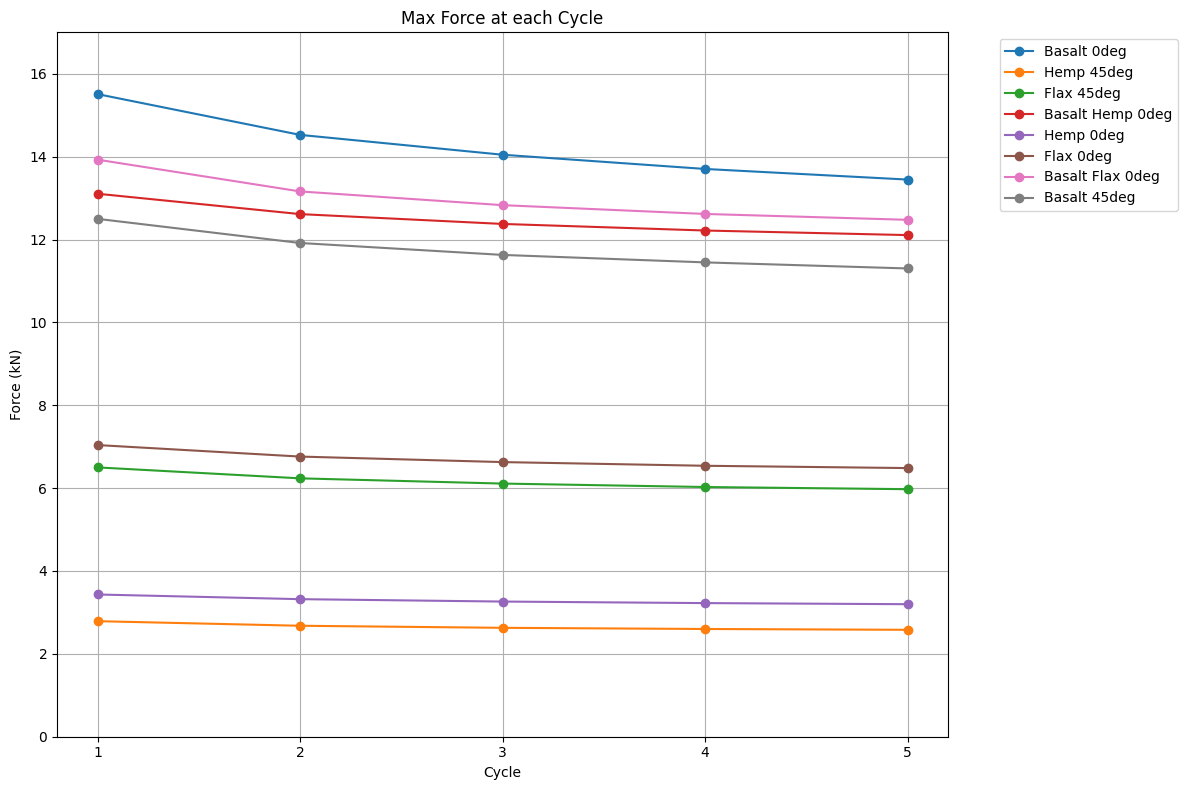

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing all the data
test_dict = {'Basalt 0deg': [1, 2], 'Hemp 45deg': [5, 6], 'Flax 45deg': [9, 10], 'Basalt Hemp 0deg': [13, 14], 'Hemp 0deg': [3, 4], 'Flax 0deg': [7, 8], 'Basalt Flax 0deg': [16, 15], 'Basalt 45deg': [11, 12]}
material_colors = {
    'Basalt 0deg': 'tab:blue',
    'Hemp 45deg': 'tab:orange',
    'Flax 45deg': 'tab:green',
    'Basalt Hemp 0deg': 'tab:red',
    'Hemp 0deg': 'tab:purple',
    'Flax 0deg': 'tab:brown',
    'Basalt Flax 0deg': 'tab:pink',
    'Basalt 45deg': 'tab:gray',
}

plt.figure(figsize=(12, 8))

for material, test_ids in test_dict.items():
    # Initialize a list to store all transition forces for each material
    all_transition_forces = []
    
    # Initialize the maximum cycle count observed across tests for this material
    max_cycle_count = 0
    
    for test_id in test_ids:
        df_test_id = df[df['test_id'] == test_id]
        
        # Find the transition points where the cycle count changes to a half cycle and gather forces
        transition_forces = []
        cycle_values = df_test_id['Cycle count'].values
        for i in range(len(cycle_values) - 1):
            if cycle_values[i] != cycle_values[i + 1] and cycle_values[i + 1] % 1 != 0:
                transition_forces.append(df_test_id.iloc[i]['Force'])
        
        all_transition_forces.append(transition_forces)
        max_cycle_count = max(max_cycle_count, len(transition_forces))
    
    # Ensure all lists have the same length for averaging by padding shorter lists with NaN
    padded_forces = [forces + [np.nan]*(max_cycle_count - len(forces)) for forces in all_transition_forces]
    
    # Calculate the average force for each transition point
    avg_forces = np.nanmean(padded_forces, axis=0)
    
    # Plot these averaged forces against the cycle numbers
    cycle_numbers = np.arange(1, max_cycle_count + 1) * 0.5  # Adjust based on your cycle counting
    plt.plot(cycle_numbers*2, avg_forces, '-o', label=material, color=material_colors[material])

plt.xlabel('Cycle')
plt.ylabel('Force (kN)')
plt.xticks(np.arange(1, 6, 1))
plt.ylim(0, 17)
plt.title('Max Force at each Cycle')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


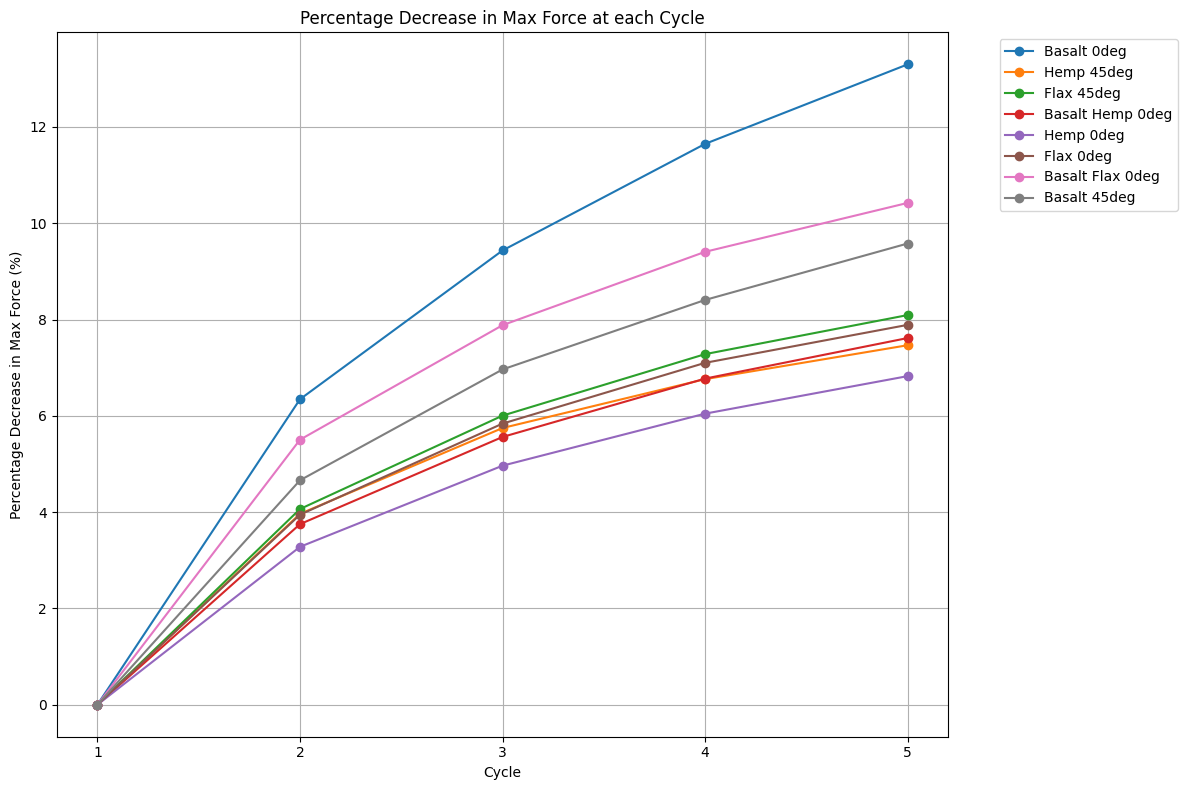

In [158]:
plt.figure(figsize=(12, 8))

for material, test_ids in test_dict.items():
    all_transition_forces = []

    for test_id in test_ids:
        df_test_id = df[df['test_id'] == test_id]

        transition_forces = []
        cycle_values = df_test_id['Cycle count'].values
        for i in range(len(cycle_values) - 1):
            if cycle_values[i] != cycle_values[i + 1] and cycle_values[i + 1] % 1 != 0:
                transition_forces.append(df_test_id.iloc[i]['Force'])
        
        # Add the last displacement of cycle 4.5 as a transition displacement
        if 4.5 in cycle_values:
            last_4_5_force = df_test_id[df_test_id['Cycle count'] == 4.5].iloc[-1]['Force']
            transition_forces.append(last_4_5_force)
        
        all_transition_forces.append(transition_forces)

    # Calculate the average force for each transition point
    max_length = max(len(l) for l in all_transition_forces)
    padded_forces = [l + [np.nan]*(max_length - len(l)) for l in all_transition_forces]
    avg_forces = np.nanmean(padded_forces, axis=0)

    # Calculate percentage change relative to the first cycle
    first_cycle_force = avg_forces[0]
    percentage_changes = [-(force - first_cycle_force) / first_cycle_force * 100 for force in avg_forces]
    percentage_changes = percentage_changes[:-1]

    # Plot these percentage changes against the cycle numbers
    cycle_numbers = np.arange(1, len(percentage_changes) + 1)
    plt.plot(cycle_numbers, percentage_changes, '-o', label=material, color=material_colors[material])

plt.xlabel('Cycle')
plt.ylabel('Percentage Decrease in Max Force (%)')
plt.xticks(np.arange(1, len(cycle_numbers) + 1, 1))
plt.title('Percentage Decrease in Max Force at each Cycle')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

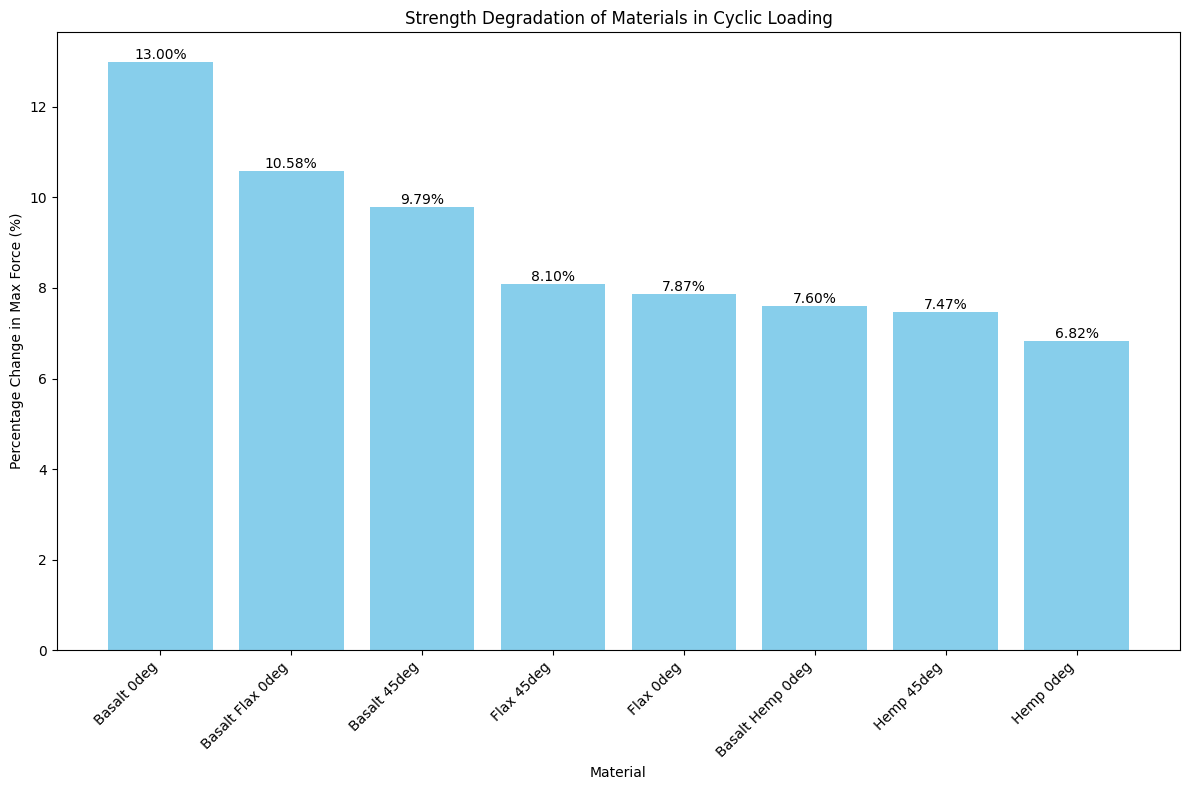

In [184]:
# Calculate the final percentage change for each material
final_percentage_changes = {}
for material, test_ids in test_dict.items():
    material_changes = []
    for test_id in test_ids:
        df_test_id = df[df['test_id'] == test_id]
        transition_forces = []
        cycle_values = df_test_id['Cycle count'].values
        for i in range(len(cycle_values) - 1):
            if cycle_values[i] != cycle_values[i + 1] and cycle_values[i + 1] % 1 != 0:
                transition_forces.append(df_test_id.iloc[i]['Force'])
        if 4.5 in cycle_values:
            last_4_5_force = df_test_id[df_test_id['Cycle count'] == 4.5].iloc[-1]['Force']
            transition_forces.append(last_4_5_force)
        # Calculate percentage change relative to the first cycle
        first_cycle_force = transition_forces[0]
        last_cycle_force = transition_forces[-2]
        percentage_change = ((last_cycle_force - first_cycle_force) / first_cycle_force) * 100
        material_changes.append(percentage_change)
    final_percentage_changes[material] = np.mean(material_changes)
# Sort materials by their final percentage change
sorted_materials = sorted(final_percentage_changes, key=final_percentage_changes.get)
sorted_changes = [-final_percentage_changes[material] for material in sorted_materials]

# Creating the bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(sorted_materials)), sorted_changes, color='skyblue')
plt.xticks(range(len(sorted_materials)), sorted_materials, rotation=45, ha="right")
plt.ylabel('Percentage Change in Max Force (%)')
plt.title('Strength Degradation of Materials in Cyclic Loading')
plt.xlabel('Material')
# Annotate each bar with its percentage value
for bar, percentage in zip(bars, sorted_changes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{percentage:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


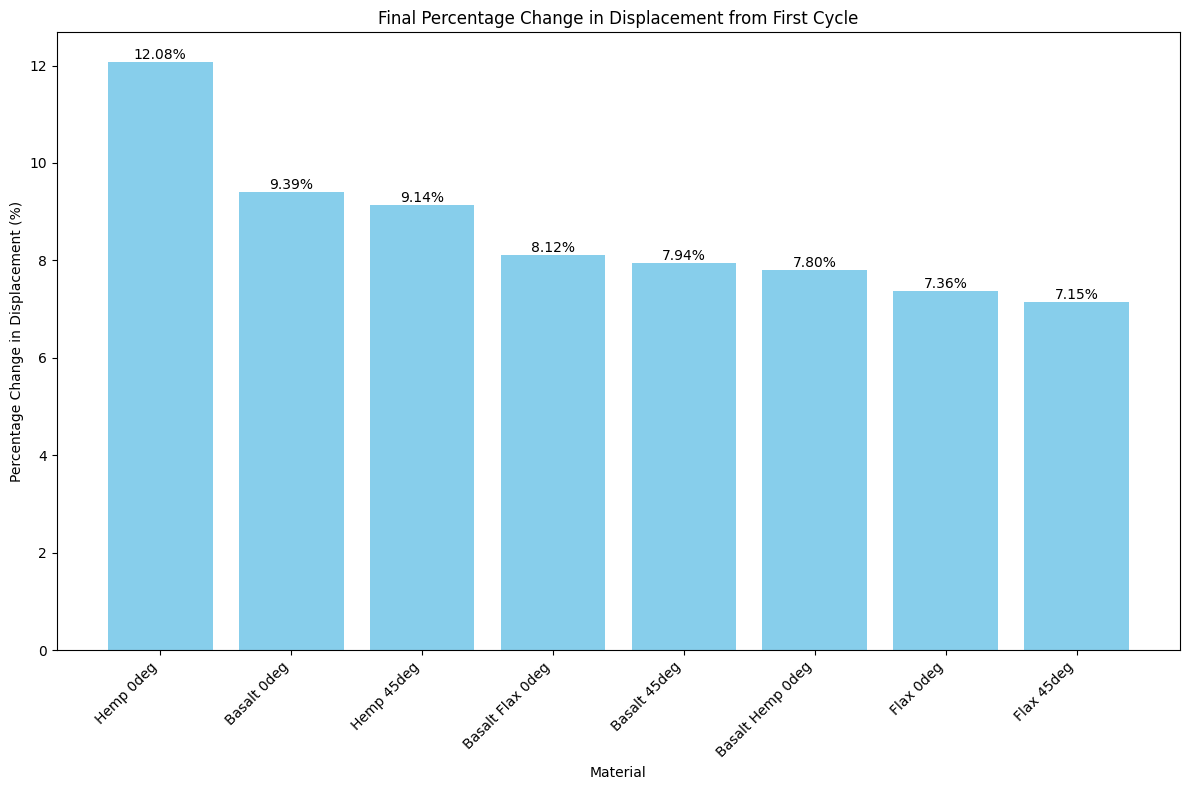

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing all the data
test_dict = {'Basalt 0deg': [1, 2], 'Hemp 45deg': [5, 6], 'Flax 45deg': [9, 10], 'Basalt Hemp 0deg': [13, 14], 'Hemp 0deg': [3, 4], 'Flax 0deg': [7, 8], 'Basalt Flax 0deg': [16, 15], 'Basalt 45deg': [11, 12]}
material_colors = {
    'Basalt 0deg': 'tab:blue',
    'Hemp 45deg': 'tab:orange',
    'Flax 45deg': 'tab:green',
    'Basalt Hemp 0deg': 'tab:red',
    'Hemp 0deg': 'tab:purple',
    'Flax 0deg': 'tab:brown',
    'Basalt Flax 0deg': 'tab:pink',
    'Basalt 45deg': 'tab:gray',
}

# Dictionary to store final percentage change for each material
final_percentage_changes = {}

for material, test_ids in test_dict.items():
    all_transition_displacements = []
    
    for test_id in test_ids:
        df_test_id = df[df['test_id'] == test_id]
        
        # Collect displacements at transition points
        transition_displacements = []
        cycle_values = df_test_id['Cycle count'].values
        for i in range(len(cycle_values) - 1):
            if cycle_values[i] != cycle_values[i + 1] and cycle_values[i + 1] % 1 == 0:
                transition_displacements.append(df_test_id.iloc[i]['Displacement'])
        
        # Add the last displacement of cycle 4.5
        if 4.5 in cycle_values:
            last_4_5_displacement = df_test_id[df_test_id['Cycle count'] == 4.5].iloc[-1]['Displacement']
            transition_displacements.append(last_4_5_displacement)
        
        all_transition_displacements.append(transition_displacements)
    
    # Calculate the average displacement for the first and last transition
    padded_displacements = [l + [np.nan]*(5 - len(l)) for l in all_transition_displacements]  # Assuming up to 5 cycles
    avg_displacements = np.nanmean(padded_displacements, axis=0)
    if len(avg_displacements) > 1:
        first_displacement = avg_displacements[0]
        last_displacement = avg_displacements[-1]
        percentage_change = ((last_displacement - first_displacement) / first_displacement) * 100
        final_percentage_changes[material] = percentage_change

# Sort materials by their final percentage change
sorted_materials = sorted(final_percentage_changes, key=final_percentage_changes.get, reverse=True)

# Prepare data for bar graph
sorted_percentage_changes = [final_percentage_changes[material] for material in sorted_materials]
colors = [material_colors[material] for material in sorted_materials]

plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_materials, sorted_percentage_changes, color='skyblue')
plt.xlabel('Material')
plt.ylabel('Percentage Change in Displacement (%)')
plt.xticks(rotation=45, ha="right")
plt.title('Final Percentage Change in Displacement from First Cycle')
# Loop over the bars and use plt.text to add percentages above each bar
for bar, percentage in zip(bars, sorted_percentage_changes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{percentage:.2f}%", va='bottom', ha='center')

plt.tight_layout()
plt.show()


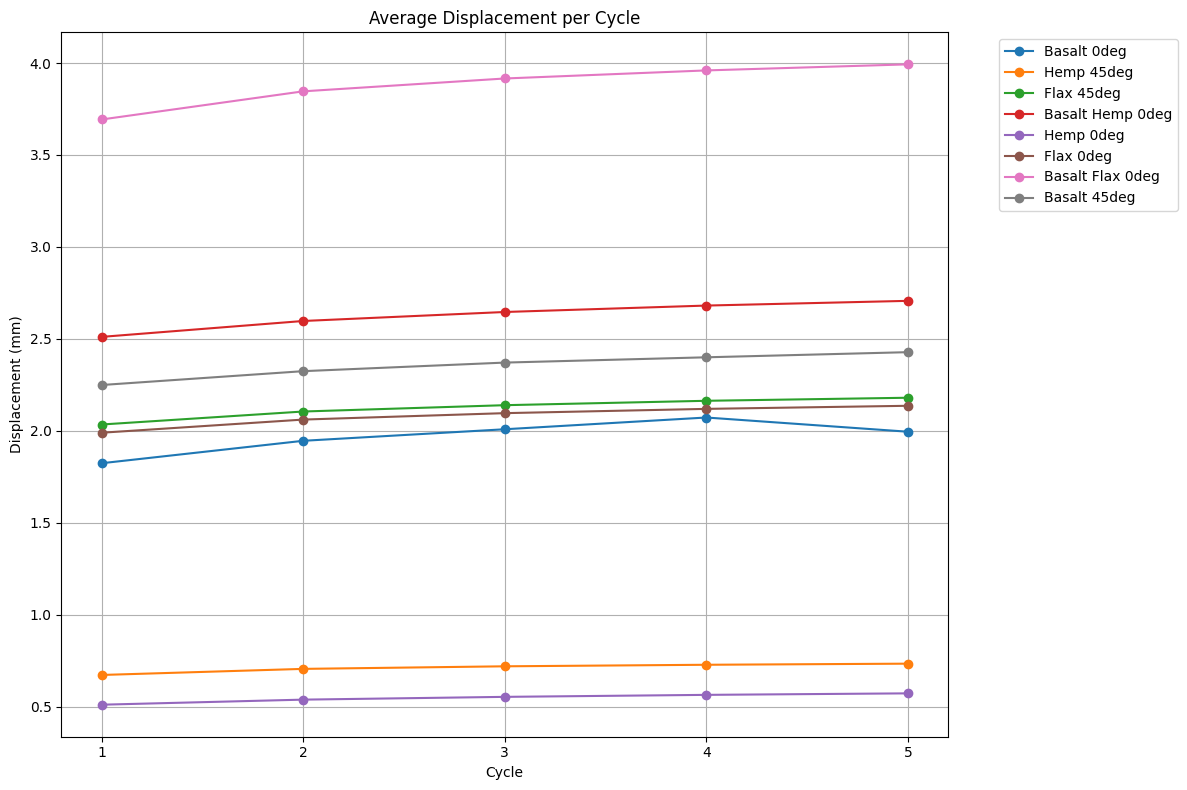

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing all the data
test_dict = {'Basalt 0deg': [1, 2], 'Hemp 45deg': [5, 6], 'Flax 45deg': [9, 10], 'Basalt Hemp 0deg': [13, 14], 'Hemp 0deg': [3, 4], 'Flax 0deg': [7, 8], 'Basalt Flax 0deg': [16, 15], 'Basalt 45deg': [11, 12]}
material_colors = {
    'Basalt 0deg': 'tab:blue',
    'Hemp 45deg': 'tab:orange',
    'Flax 45deg': 'tab:green',
    'Basalt Hemp 0deg': 'tab:red',
    'Hemp 0deg': 'tab:purple',
    'Flax 0deg': 'tab:brown',
    'Basalt Flax 0deg': 'tab:pink',
    'Basalt 45deg': 'tab:gray',
}

plt.figure(figsize=(12, 8))

for material, test_ids in test_dict.items():
    all_transition_displacements = []
    
    for test_id in test_ids:
        df_test_id = df[df['test_id'] == test_id]
        
        # Collect displacements at transition points
        transition_displacements = []
        cycle_values = df_test_id['Cycle count'].values
        for i in range(len(cycle_values) - 1):
            if cycle_values[i] != cycle_values[i + 1] and cycle_values[i + 1] % 1 == 0:
                transition_displacements.append(df_test_id.iloc[i]['Displacement'])
        
        # Add the last displacement of cycle 4.5
        if 4.5 in cycle_values:
            last_4_5_displacement = df_test_id[df_test_id['Cycle count'] == 4.5].iloc[-1]['Displacement']
            transition_displacements.append(last_4_5_displacement)
        
        all_transition_displacements.append(transition_displacements)
    
    # Average displacements across tests for the same material
    # Ensure lists are the same length for averaging
    max_length = max(len(l) for l in all_transition_displacements)
    padded_displacements = [l + [np.nan]*(max_length - len(l)) for l in all_transition_displacements]
    avg_displacements = np.nanmean(padded_displacements, axis=0)
    
    # Plot these averaged displacements against the cycle numbers
    cycle_numbers = np.arange(1, len(avg_displacements) + 1)
    plt.plot(cycle_numbers, avg_displacements, '-o', label=material, color=material_colors[material])

plt.xlabel('Cycle')
plt.ylabel('Displacement (mm)')
plt.xticks(np.arange(1, 6, 1))  # Adjust x-ticks to show cycles 1 to 5
plt.title('Average Displacement per Cycle')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


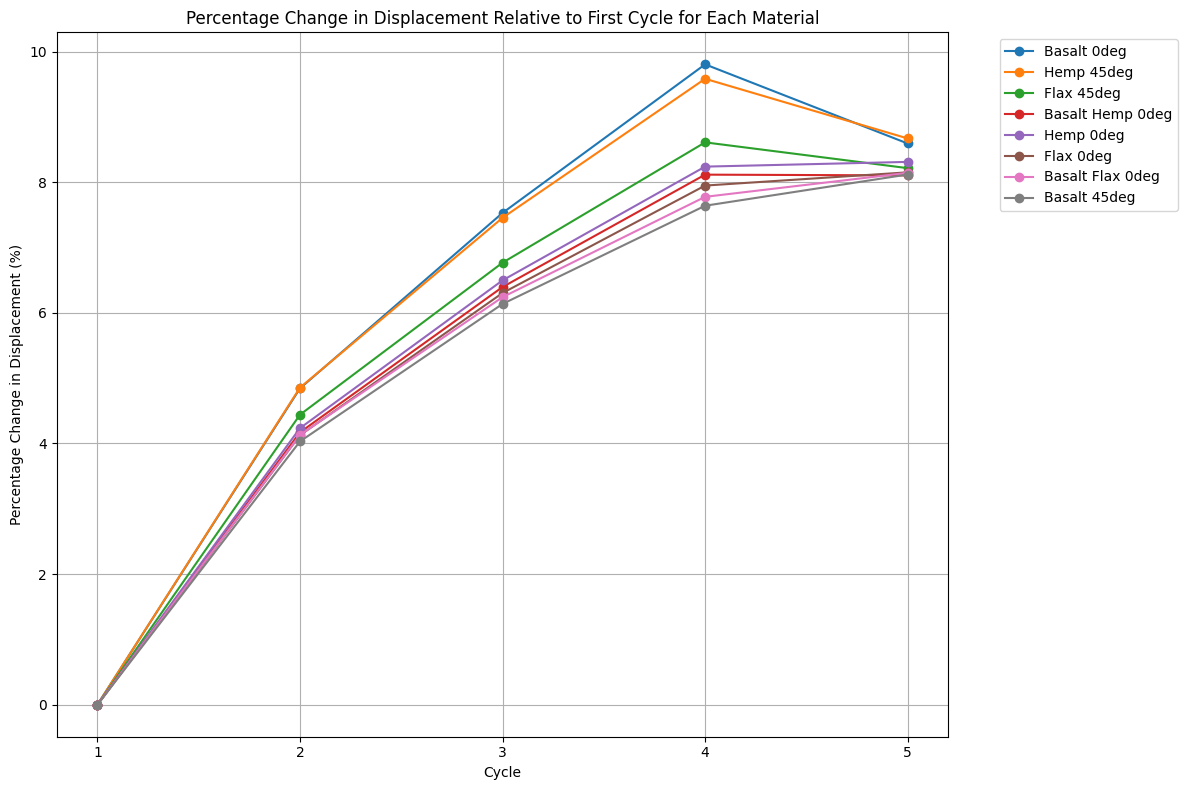

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing all the data
test_dict = {'Basalt 0deg': [1, 2], 'Hemp 45deg': [5, 6], 'Flax 45deg': [9, 10], 'Basalt Hemp 0deg': [13, 14], 'Hemp 0deg': [3, 4], 'Flax 0deg': [7, 8], 'Basalt Flax 0deg': [16, 15], 'Basalt 45deg': [11, 12]}
material_colors = {
    'Basalt 0deg': 'tab:blue',
    'Hemp 45deg': 'tab:orange',
    'Flax 45deg': 'tab:green',
    'Basalt Hemp 0deg': 'tab:red',
    'Hemp 0deg': 'tab:purple',
    'Flax 0deg': 'tab:brown',
    'Basalt Flax 0deg': 'tab:pink',
    'Basalt 45deg': 'tab:gray',
}

plt.figure(figsize=(12, 8))

for material, test_ids in test_dict.items():
    all_percentage_changes = []

    for test_id in test_ids:
        df_test_id = df[df['test_id'] == test_id]
        
        # Collect displacements at transition points, including the last value of cycle 4.5
        transition_displacements = []
        cycle_values = df_test_id['Cycle count'].values
        for i in range(len(cycle_values) - 1):
            if cycle_values[i] != cycle_values[i + 1] and cycle_values[i + 1] % 1 == 0:
                transition_displacements.append(df_test_id.iloc[i]['Displacement'])
        if 4.5 in cycle_values:
            last_4_5_displacement = df_test_id[df_test_id['Cycle count'] == 4.5].iloc[-1]['Displacement']
            transition_displacements.append(last_4_5_displacement)

        all_transition_displacements.append(transition_displacements)
    
    # Calculate the percentage change relative to the first cycle for each transition point
    first_cycle_displacement = np.nanmean([l[0] for l in all_transition_displacements if l])  # Average of first displacements
    avg_displacements = np.nanmean([l + [np.nan]*(5 - len(l)) for l in all_transition_displacements], axis=0)  # Averaging displacements
    percentage_changes = ((avg_displacements - first_cycle_displacement) / first_cycle_displacement) * 100

    # Plot these percentage changes against the cycle numbers
    cycle_numbers = np.arange(1, 6)
    plt.plot(cycle_numbers, percentage_changes, '-o', label=material, color=material_colors[material])

plt.xlabel('Cycle')
plt.ylabel('Percentage Change in Displacement (%)')
plt.xticks(np.arange(1, 6, 1))  # Adjust x-ticks to show cycles 1 to 5
plt.title('Percentage Change in Displacement Relative to First Cycle for Each Material')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
